In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('boston.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')

In [21]:
df = df[['MEDV','AGE','LSTAT']]

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc=sc.fit(df)

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model 
X=df[['AGE','LSTAT']].values
X=sc.fit_transform(X)
y=df['MEDV'].values
X=X.astype(float)
y=y.astype(float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    random_state=16)

In [24]:

from sklearn import linear_model 

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

31.26170025540614
[  5.58919129 -41.93286234]


In [25]:
import numpy as np
from sklearn import metrics
y_test_pred=model.predict(X_test)
print('Score or R-squared: ',model.score(X_test,y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_test_pred)) 

Score or R-squared:  0.4069676937197574
Mean Absolute Error: 4.5918745715026485
Mean Squared Error: 39.2469310400114
Root Mean Squared Error: 6.264737108611294
Mean Absolute percentage Error: 0.2547803169337023


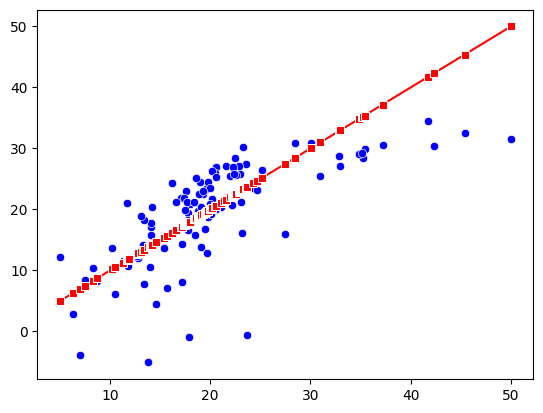

In [26]:
import seaborn  as sns
sns.lineplot(x=y_test.flatten(),y=y_test.flatten(),marker='s',color='r')
sns.scatterplot(x=y_test.flatten(),y=y_test_pred.flatten(),marker='o',color='b')
plt.show()

In [27]:
y_test_pred=model.predict(X_test)
dfTestValidation =pd.DataFrame(list(zip(X_test[:,0],X_test[:,1],
                                        y_test.flatten(),
                                        y_test_pred.flatten())),
                                        columns=['AGE_test','LSTAT_test','y_test','y_test_predicted'])
dfTestValidation['Residual']=dfTestValidation['y_test'] - dfTestValidation['y_test_predicted']
dfTestValidation

,AGE_test,LSTAT_test,y_test,y_test_predicted,Residual
0,1.000000,0.156181,23.3,30.301775,-7.001775
1,0.937178,0.583609,12.8,12.027361,0.772639
2,0.771370,0.779249,6.3,2.896873,3.403127
3,0.503605,0.133830,35.2,28.464566,6.735434
4,0.983522,0.354857,17.1,21.878644,-4.778644
...,...,...,...,...,...
97,0.880536,0.356512,17.7,21.233607,-3.533607
98,0.235839,0.227373,19.3,23.045448,-3.745448
99,0.947477,0.544150,15.4,13.739558,1.660442
100,0.952626,0.366998,18.4,21.196842,-2.796842


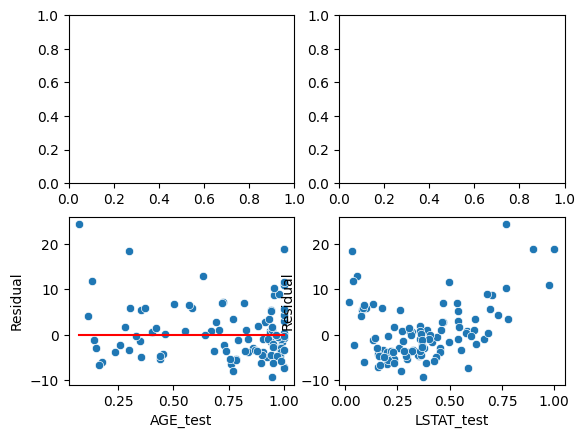

In [28]:
fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dfTestValidation,x='AGE_test',y='Residual',ax=axes[1,0])
sns.lineplot(data=dfTestValidation,x='AGE_test',y=[0]*len(dfTestValidation),color='r',ax=axes[1,0])
sns.scatterplot(data=dfTestValidation,x='LSTAT_test',y='Residual',ax=axes[1,1])
plt.show()

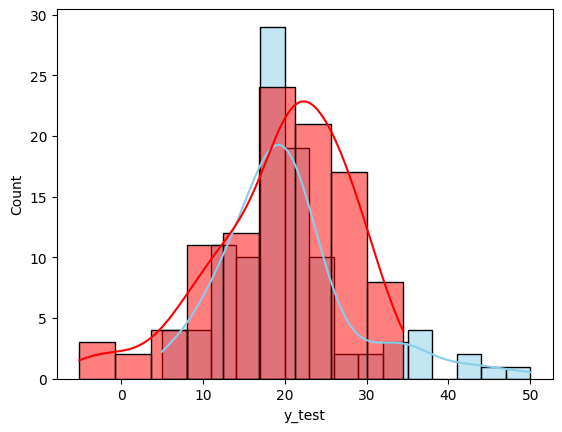

In [29]:
sns.histplot(data=dfTestValidation,x='y_test',color="skyblue",label="Actual",kde=True)
sns.histplot(data=dfTestValidation,x='y_test_predicted',color="red",label="Forecast",kde=True)
plt.show()

In [30]:
import numpy as np
from sklearn import metrics
y_train_pred=model.predict(X_train)
print('Score or R-squared: ',model.score(X_train,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Mean Absolute percentage Error:', metrics.mean_absolute_percentage_error(y_train, y_train_pred)) 

Score or R-squared:  0.5630979953818331
Mean Absolute Error: 4.5662139087194324
Mean Squared Error: 38.20805667876179
Root Mean Squared Error: 6.181266591788595
Mean Absolute percentage Error: 0.2182889452914896


In [31]:
y_train_pred=model.predict(X_train)
dfTestValidation =pd.DataFrame(list(zip(X_test[:,0],X_test[:,1],
                                        y_test.flatten(),
                                        y_test_pred.flatten())),
                                        columns=['AGE_train','LSTAT_train','y_train','y_train_predicted'])
dfTestValidation['Residual']=dfTestValidation['y_train'] - dfTestValidation['y_train_predicted']
dfTestValidation

,AGE_train,LSTAT_train,y_train,y_train_predicted,Residual
0,1.000000,0.156181,23.3,30.301775,-7.001775
1,0.937178,0.583609,12.8,12.027361,0.772639
2,0.771370,0.779249,6.3,2.896873,3.403127
3,0.503605,0.133830,35.2,28.464566,6.735434
4,0.983522,0.354857,17.1,21.878644,-4.778644
...,...,...,...,...,...
97,0.880536,0.356512,17.7,21.233607,-3.533607
98,0.235839,0.227373,19.3,23.045448,-3.745448
99,0.947477,0.544150,15.4,13.739558,1.660442
100,0.952626,0.366998,18.4,21.196842,-2.796842


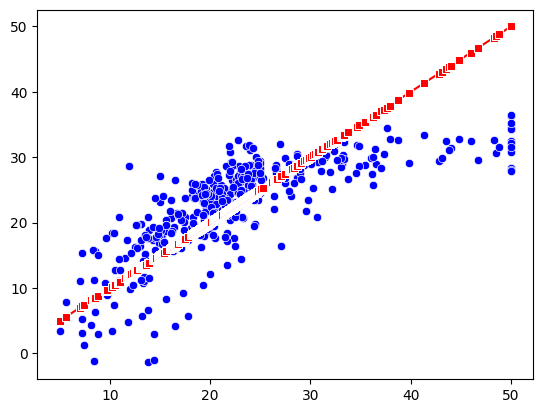

In [32]:
import seaborn  as sns
sns.lineplot(x=y_train.flatten(),y=y_train.flatten(),marker='s',color='r')
sns.scatterplot(x=y_train.flatten(),y=y_train_pred.flatten(),marker='o',color='b')
plt.show()

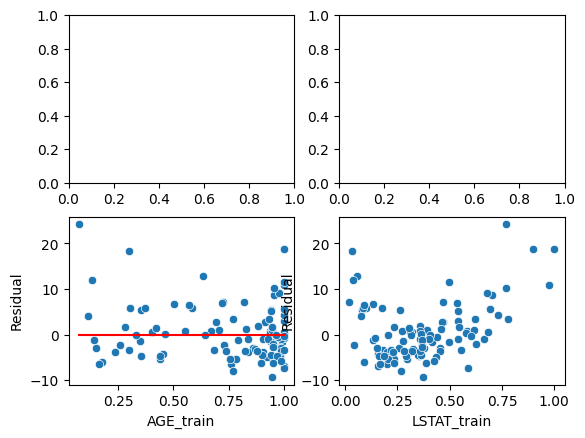

In [33]:
fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dfTestValidation,x='AGE_train',y='Residual',ax=axes[1,0])
sns.lineplot(data=dfTestValidation,x='AGE_train',y=[0]*len(dfTestValidation),color='r',ax=axes[1,0])
sns.scatterplot(data=dfTestValidation,x='LSTAT_train',y='Residual',ax=axes[1,1])
plt.show()

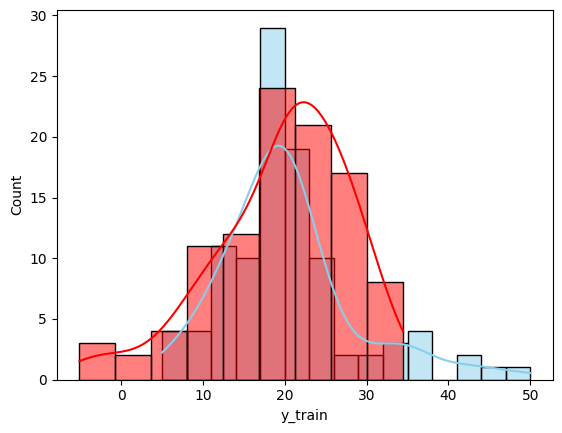

In [34]:
sns.histplot(data=dfTestValidation,x='y_train',color="skyblue",label="Actual",kde=True)
sns.histplot(data=dfTestValidation,x='y_train_predicted',color="red",label="Forecast",kde=True)
plt.show()